In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [5]:
# Load digits dataset
digits = load_digits()
X = digits.images       # Shape: (1797, 8, 8)
y = digits.target       # Labels: 0–9

# Convert to binary classification: 1 = '1', 0 = 'not 1'
y_binary = (y == 1).astype(int)

# Flatten 8x8 images to 64 features
X_flat = X.reshape(-1, 64)

# Normalize using MinMaxScaler (or just divide by 16)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_flat)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)


Total images: 1797


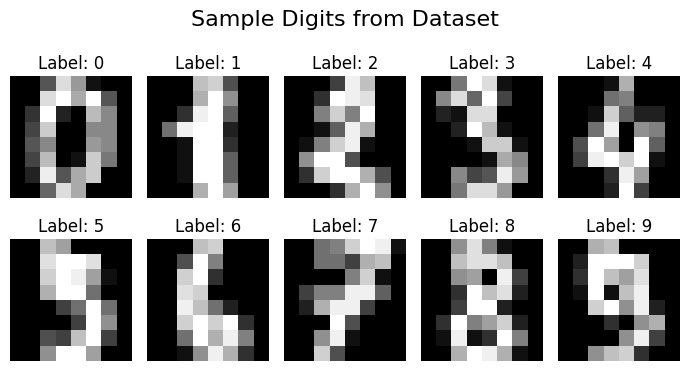

In [9]:
# Print total number of samples
print(f"Total images: {len(digits.images)}")

# Plot the first 10 images with their labels
plt.figure(figsize=(7, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')  # Show image
    plt.title(f"Label: {digits.target[i]}")     # Show label (0–9)
    plt.axis('off')                             # Hide axes

plt.suptitle("Sample Digits from Dataset", fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
model = Sequential([
    Dense(32, activation='sigmoid', input_shape=(64,)),  # Hidden layer
    Dense(1, activation='sigmoid')                       # Output layer
])


In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7334 - loss: 0.5916 - val_accuracy: 0.8924 - val_loss: 0.3654
Epoch 2/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9097 - loss: 0.3244 - val_accuracy: 0.8924 - val_loss: 0.3226
Epoch 3/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8914 - loss: 0.3187 - val_accuracy: 0.8924 - val_loss: 0.3098
Epoch 4/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8868 - loss: 0.3119 - val_accuracy: 0.8924 - val_loss: 0.2975
Epoch 5/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8963 - loss: 0.2814 - val_accuracy: 0.8924 - val_loss: 0.2848
Epoch 6/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9105 - loss: 0.2461 - val_accuracy: 0.8924 - val_loss: 0.2724
Epoch 7/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8934 - loss: 0.2519 - val_accuracy: 0.8924 - val_loss: 0.2592
Epoch 8/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8818 - loss: 0.2533 - val_accuracy: 0.8924 - val_loss

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9803 - loss: 0.0689  
Test Accuracy: 97.22%


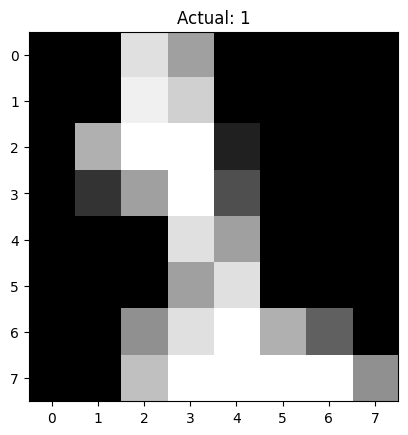

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted: Not 1


In [10]:
idx = 5
sample = X_test[idx]
plt.imshow(sample.reshape(8,8), cmap='gray')
plt.title("Actual: {}".format("1" if y_test[idx] == 1 else "Not 1"))
plt.show()

# Predict
prediction = model.predict(sample.reshape(1, 64))
print("Predicted:", "1" if prediction[0][0] > 0.5 else "Not 1")


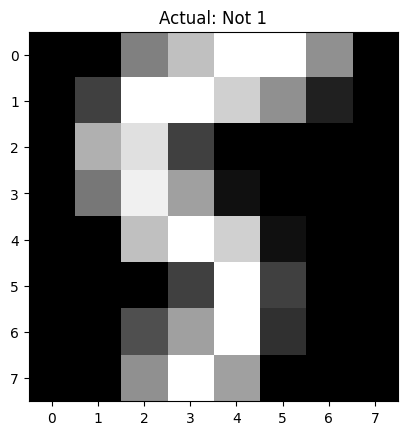

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted: Not 1


In [11]:
idx = 6
sample = X_test[idx]
plt.imshow(sample.reshape(8,8), cmap='gray')
plt.title("Actual: {}".format("1" if y_test[idx] == 1 else "Not 1"))
plt.show()

# Predict
prediction = model.predict(sample.reshape(1, 64))
print("Predicted:", "1" if prediction[0][0] > 0.5 else "Not 1")
